In [10]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree   
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve,roc_auc_score,auc 

data = pd.read_csv("Test.csv", encoding="ISO-8859-1")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,2,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,1,0,1,0,0,1


In [2]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [3]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Sex"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


In [4]:
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   
y_pred=tree1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7865168539325843


In [5]:
import sklearn
print(sklearn.__version__)

0.23.2


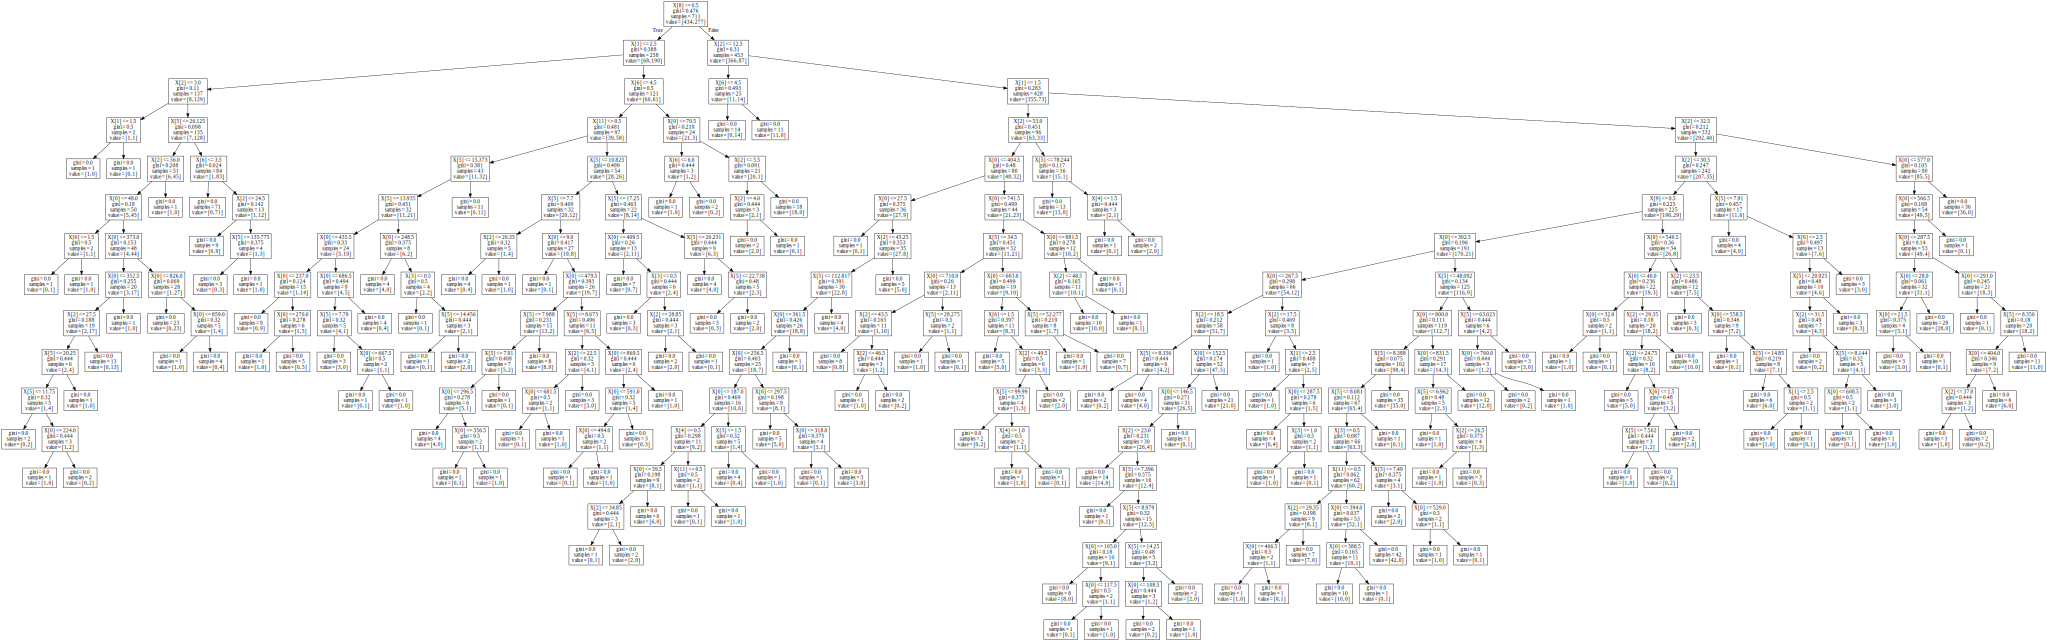

In [6]:
#import graphviz
#dot_data = tree.export_graphviz(tree1,out_file=None)
#graph = graphviz.Source(dot_data)
#graph.render('data')
#graph



import graphviz 
data = tree.export_graphviz (tree1,out_file=None)
graph = graphviz.Source(data)
graph.render("data")
graph

In [9]:
tree2 = tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
tree2.fit(x_train, y_train)   
y_pred=tree2.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8426966292134831


In [12]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.848314606741573
